<a href="https://colab.research.google.com/github/rajatraiii/Machine_learnig/blob/main/classfication_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Movie_classification.csv to Movie_classification.csv
User uploaded file "Movie_classification.csv" with length 55568 bytes


In [3]:
df=pd.read_csv("Movie_classification.csv", header=0)

In [4]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [5]:
df.dtypes

Marketing expense      float64
Production expense     float64
Multiplex coverage     float64
Budget                 float64
Movie_length           float64
Lead_ Actor_Rating     float64
Lead_Actress_rating    float64
Director_rating        float64
Producer_rating        float64
Critic_rating          float64
Trailer_views            int64
3D_available            object
Time_taken             float64
Twitter_hastags        float64
Genre                   object
Avg_age_actors           int64
Num_multiplex            int64
Collection               int64
Start_Tech_Oscar         int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [7]:
df["Time_taken"].mean()

157.3914979757085

In [8]:
df["Time_taken"].fillna(value=df["Time_taken"].mean(),inplace=True)

In [9]:

df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [11]:
df=pd.get_dummies(df,columns=["3D_available","Genre"],drop_first=True)

In [12]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


In [13]:

X=df.loc[:,df.columns!="Start_Tech_Oscar"]
type(X)

pandas.core.frame.DataFrame

In [14]:
X.shape

(506, 20)

In [15]:
y=df["Start_Tech_Oscar"]
type(y)

pandas.core.series.Series

In [16]:

y.shape

(506,)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
X_train.shape

(404, 20)

In [20]:
X_test.shape

(102, 20)

In [21]:
from sklearn import tree

In [22]:

clftree=tree.DecisionTreeClassifier(max_depth=3)
clftree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [23]:
y_train_pred=clftree.predict(X_train)

In [24]:
y_test_pred=clftree.predict(X_test)

In [25]:

y_test_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [26]:

from sklearn.metrics import accuracy_score,confusion_matrix


In [27]:
confusion_matrix(y_train,y_train_pred)

array([[172,  14],
       [126,  92]])

In [28]:
confusion_matrix(y_test,y_test_pred)

array([[39,  5],
       [41, 17]])

In [29]:



accuracy_score(y_test,y_test_pred)

0.5490196078431373

In [30]:


dot_data=tree.export_graphviz(clftree,out_file=None,feature_names=X_train.columns, filled=True)


In [31]:

from IPython.display import Image

In [32]:


import pydotplus

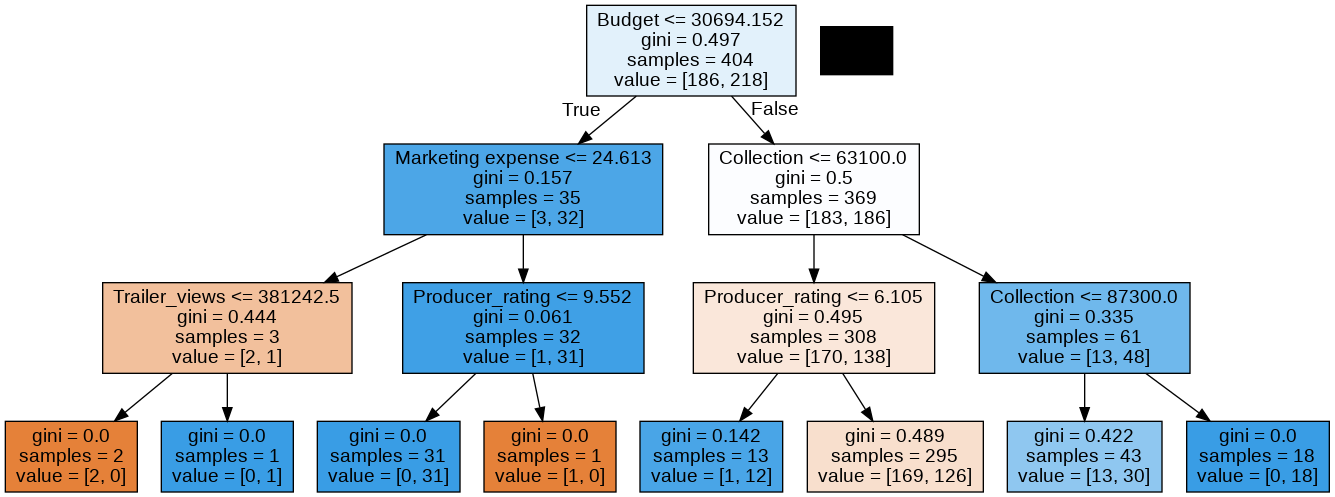

In [33]:

graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Growth controller

In [34]:
clftree2=tree.DecisionTreeClassifier(min_samples_leaf=20,max_depth=4)
clftree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)

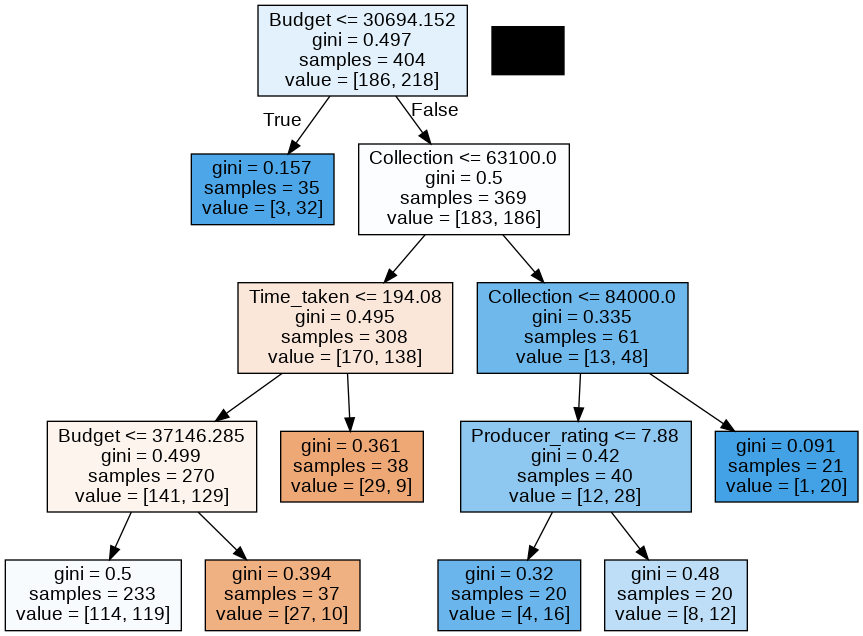

In [35]:

dot_data=tree.export_graphviz(clftree2,out_file=None, feature_names=X_train.columns, filled= True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [36]:
accuracy_score(y_test,clftree2.predict(X_test))

0.5588235294117647

# Bagging

In [37]:
from sklearn import tree

In [38]:
cl_tree=tree.DecisionTreeClassifier()


In [39]:
from sklearn.ensemble import BaggingClassifier

In [40]:
bag_clf=BaggingClassifier(base_estimator=cl_tree,n_estimators=1000,bootstrap=True,n_jobs=-1,random_state=42)

In [41]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [42]:
confusion_matrix(y_test,bag_clf.predict(X_test))

array([[27, 17],
       [22, 36]])

In [43]:
accuracy_score(y_test,bag_clf.predict(X_test))

0.6176470588235294

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf_clf=RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)

In [46]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [47]:
confusion_matrix(y_test,rf_clf.predict(X_test))

array([[25, 19],
       [18, 40]])

In [48]:
accuracy_score(y_test,rf_clf.predict(X_test))

0.6372549019607843

# Grid search CV

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
rf_clf=RandomForestClassifier(n_estimators=250,random_state=42)

In [51]:
params_grid={"max_features":[4,5,6,7,8,9,10],
             "min_samples_split":[2,3,10],
             }

In [52]:
Grid_search=GridSearchCV(rf_clf, params_grid,n_jobs=-1,cv=5,scoring="accuracy")

In [53]:
Grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [54]:
Grid_search.best_params_

{'max_features': 6, 'min_samples_split': 3}

In [55]:
cvrf_clf=Grid_search.best_estimator_

In [56]:
confusion_matrix(y_test,cvrf_clf.predict(X_test))

array([[25, 19],
       [19, 39]])

In [57]:
accuracy_score(y_test,cvrf_clf.predict(X_test))

0.6274509803921569

# Gradient boosting classifer

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gb_clf=GradientBoostingClassifier()

In [63]:
gb_clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [64]:
accuracy_score(y_test,gb_clf.predict(X_test))

0.5882352941176471

In [119]:
gb_clf2=GradientBoostingClassifier(learning_rate=0.02,n_estimators=1000,max_depth=5,random_state=1)

In [120]:
gb_clf2.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=5, n_estimators=1000,
                           random_state=1)

In [121]:
accuracy_score(y_test,gb_clf2.predict(X_test))

0.6274509803921569

# Adaboost classifier

In [110]:
from sklearn.ensemble import AdaBoostClassifier

In [112]:
ad_clf=AdaBoostClassifier(learning_rate=0.02,n_estimators=5000)

In [113]:
ad_clf.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [115]:
accuracy_score(y_test,ad_clf.predict(X_test))

0.6274509803921569

In [122]:
ad_clf2=AdaBoostClassifier(rf_clf,learning_rate=0.05,n_estimators=500)

In [132]:
ad_clf2.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=250,
                                                         random_state=42),
                   learning_rate=0.05, n_estimators=500)

In [133]:
accuracy_score(y_test,ad_clf2.predict(X_test))

0.6568627450980392

# XGBoost

In [134]:
import xgboost as xgb

In [135]:
xg_clf=xgb.XGBClassifier(max_depth=5,n_estimators=10000,learning_rate=0.3,n_jobs=-1)

In [136]:
xg_clf.fit(X_train,y_train)

XGBClassifier(learning_rate=0.3, max_depth=5, n_estimators=10000, n_jobs=-1)

In [138]:
accuracy_score(y_test,xg_clf.predict(X_test))

0.6666666666666666

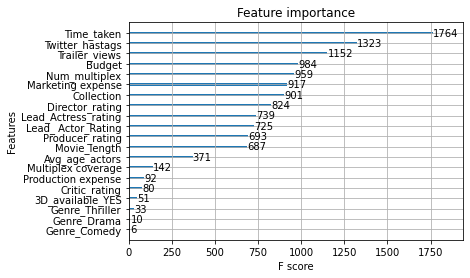

In [139]:
xgb.plot_importance(xg_clf)

In [140]:
xgb_clf2=xgb.XGBClassifier(n_estimators=500,learning_rate=0.1,random_state=42)

In [141]:
param_test1={"max_depth":range(3,10,2),
             "gamma":    [0.1,0.2,0.3],
             "subsample":[0.9,0.9],
             "colsample_bytree":[0.8,0.9],
             "reg_alpha":[1e-2,0.1,1]
             }

In [142]:
Grid_search=GridSearchCV(xgb_clf2,param_test1,n_jobs=-1,cv=5,scoring="accuracy")

In [143]:
Grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(n_estimators=500, random_state=42),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.9, 0.9]},
             scoring='accuracy')

In [145]:
cvxg_clf=Grid_search.best_estimator_

In [150]:
Grid_search.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.3,
 'max_depth': 7,
 'reg_alpha': 0.1,
 'subsample': 0.9}

In [146]:
accuracy_score(y_test,cvxg_clf.predict(X_test))

0.6666666666666666